
1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.
(Exercise 4.10 Crosstab "days_since_prior_order" and "order_number")
2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.
3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

3B. Use the region information in this Wikipedia article to create your column (you only need to create regions,not divisions).

3C. Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.
5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)
6. Create an appropriate visualization to show the distribution of profiles.
7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
9. Produce suitable charts to illustrate your results and export them in your project folder.
10. Tidy up your script, export your final data set, and save your notebook.

## 1. Import libraries and Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/jazmingutierrez/DEC2023 Instacart Basket Analysis'

In [3]:
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all.pkl'))

In [4]:
# Check data 
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,First Name,Surnam,Gender,State,Age,date_joined,n_dependants,fam_status,income,merged
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
pd.set_option('display.max_columns', None)
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spender,spender_flag,average_spend,Customer_frequency,frequency_flag,First Name,Surnam,Gender,State,Age,date_joined,n_dependants,fam_status,income,merged
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days,Most orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busiest days,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busiest days,Most orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## (Exercise 4.10 Crosstab "days_since_prior_order" and "order_number")

In [6]:
#Exercise 4.10 Crosstab "days_since_prior_order" and "order_number"
crosstab = pd.crosstab(ords_prods_all['days_since_prior_order'], ords_prods_all['order_number'], dropna = False)

In [7]:
crosstab.to_clipboard()

In [8]:
crosstab

order_number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
days_since_prior_order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0,20562,20452,17998,16451,16061,14396,13896,12782,11471,11795,9837,9443,8968,8441,8141,7854,7751,7043,6908,7091,6431,6172,6111,6037,5545,6053,5573,5208,5686,4817,5135,4630,4537,4559,4392,4316,4094,3866,4031,4059,3827,3680,3670,3227,3526,3328,2720,3164,2636,2483,2929,2626,2523,2379,2484,2376,2222,2357,2196,2073,2249,1856,2032,1586,2128,1941,1871,1561,1674,1705,1575,1732,1557,1341,1538,1526,1422,1370,1185,1306,1197,1152,1493,1344,1360,1139,1180,1178,1195,1150,1040,937,1136,1099,1041,884,1038,936
1.0,0,31693,29975,28025,27109,25545,25013,22935,21797,21081,21279,19533,19117,18297,18557,18143,16781,15983,15523,15136,15194,13860,13624,13242,12869,13017,12945,11977,12535,12092,11756,11586,10873,10402,9699,9698,9766,9515,9570,9460,8650,8877,8716,8581,8449,8328,8489,8205,7715,7152,7721,6981,6531,7039,7120,6252,6443,6268,5899,5852,5606,5950,4935,5728,4856,4952,5266,4678,4572,4699,4128,4406,4224,4232,4014,3923,4108,3999,3597,4135,3519,3151,3458,3289,3246,3110,2972,2694,3028,2790,2803,2729,2606,2606,2641,2437,2540,2635,2365
2.0,0,46489,46298,43933,40757,40944,38138,37560,35776,33861,33394,31496,30633,30275,28650,27600,26707,26253,25631,23742,23547,23995,23071,22358,21847,21616,20667,19792,18965,19251,18751,18343,17119,17542,16402,16034,16455,16114,15578,14677,14458,14356,13406,12932,12953,12907,12070,13449,12357,11736,11723,10613,10582,10818,10220,9502,9713,9352,8830,8736,8967,8186,8194,7718,7419,7766,7345,7042,7152,6629,6739,6395,6295,5956,5713,5634,5224,5060,5075,4706,4927,4396,4803,4663,3948,3939,4074,4206,3477,3624,3558,3314,3592,3323,3073,2986,3058,3092,2612
3.0,0,61701,63450,60047,57931,56219,52916,49333,48324,47858,45073,43027,42157,40736,38467,37972,35965,34700,34421,32676,32424,31502,30704,29458,29034,28280,26487,27109,25777,23447,23617,24501,23843,22242,21883,21343,20636,20815,19521,20927,18557,17972,17445,16918,16386,16437,15523,15550,14249,14997,13655,13566,12930,12227,11596,11847,11213,10582,10607,9906,10064,9846,9028,9241,8352,7936,7900,7431,7957,7230,6664,6839,6270,6280,6440,6074,5437,5175,5432,4889,5014,4559,4443,3803,4247,4007,3919,3361,3578,3321,3239,2799,3079,2904,2638,2661,2462,2170,2468
4.0,0,76794,78922,73606,70592,66629,62452,61200,59568,57743,54768,51993,48825,46951,45881,44286,42159,41308,39444,37354,36553,36511,35936,33159,34180,31369,31070,30129,28558,27040,26975,26033,24469,24675,23994,23063,22958,21603,20810,19032,19404,19351,18786,18737,18098,16600,16206,15579,15013,14213,13811,13041,12917,12026,11659,11937,11605,10302,9874,9649,9036,8725,8579,7764,8199,7329,6615,6336,6119,6475,6388,5591,5329,4988,5214,4348,4798,4444,4187,4232,3870,3988,3446,3225,2845,2864,2587,2718,2636,2344,2260,2492,2032,1800,2083,1918,1795,1695,1813
5.0,0,89103,91826,86577,81933,77645,73637,70078,64515,63201,59501,55598,53571,53009,49314,47010,47061,44918,42118,40813,40226,37744,35524,36180,34823,32303,31884,29675,29437,29404,27850,26105,25981,24215,23091,22137,21247,20037,19615,20538,18751,17608,16963,15613,15500,14361,14101,13331,13494,11473,12052,11752,10820,10358,10194,9084,8725,8590,7685,7893,6741,6402,6571,5762,5387,5301,4615,5513,5067,4401,4120,4278,3549,3444,3250,3199,2488,2731,2752,2819,2292,2303,2139,2100,2372,2003,1946,1567,1462,1630,1633,1368,984,1216,1222,1168,966,912,936
6.0,0,120786,123008,114762,106859,100838,96045,89830,87290,78707,78967,74788,68716,65194,62432,58847,56537,54838,53312,51340,49445,46257,44204,41047,38619,38755,36463,35113,33706,32666,30875,29993,28507,28327,26623,26542,24117,22776,22756,20885,19377,18807,17775,17411,16761,15150,14003,12430,12947,11617,11091,9644,9284,8378,8696,7306,7087,

## 2. Address PII Data

The Data contains PII information such as first and last names. A new dataframe will me executed to drop PII information. 

In [9]:
df_all = ords_prods_all.drop(['First Name', 'Surnam'], axis=1)

In [10]:
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spender,spender_flag,average_spend,Customer_frequency,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,merged
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days,Most orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busiest days,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busiest days,Most orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both


## 3. Create a region Column 

In [11]:
# create Region for Midwest
df_all.loc[(df_all['State'] == 'Wisconsin') | 
         (df_all['State'] == 'Michigan') | 
         (df_all['State'] == 'Illinois') | 
         (df_all['State'] == 'Indiana') | 
         (df_all['State'] == 'Ohio') | 
         (df_all['State'] == 'North Dakota')|
         (df_all['State'] == 'South Dakota')|
         (df_all['State'] == 'Nebraska')|
         (df_all['State'] == 'Kansas')|
         (df_all['State'] == 'Minnesota')|
         (df_all['State'] == 'Iowa')|
         (df_all['State'] == 'Missouri'), 
         'Region'] = 'Midwest'

In [12]:
# Create Norteast
df_all.loc[(df_all['State'] == 'Maine') | 
         (df_all['State'] == 'New Hampshire') | 
         (df_all['State'] == 'Vermont') | 
         (df_all['State'] == 'Massachusetts') | 
         (df_all['State'] == 'Rhode Island') | 
         (df_all['State'] == 'Connecticut')|
         (df_all['State'] == 'New York')|
         (df_all['State'] == 'Pennsylvania')|
         (df_all['State'] == 'New Jersey'), 
         'Region'] = 'Northeast'

In [13]:
# Creating A region for South
df_all.loc[(df_all['State'] == 'Delaware')|
          (df_all['State'] == 'Maryland')|
          (df_all['State'] == 'District of Columbia')|
          (df_all['State'] == 'Virginia')|
          (df_all['State'] == 'West Virginia')|
          (df_all['State'] == 'North Carolina')|
          (df_all['State'] == 'South Carolina')|
          (df_all['State'] == 'Georgia')|
          (df_all['State'] == 'Florida')|
          (df_all['State'] == 'Kentucky')|
          (df_all['State'] == 'Tennessee')|
          (df_all['State'] == 'Mississippi')|
          (df_all['State'] == 'Alabama')|
          (df_all['State'] == 'Oklahoma')|
          (df_all['State'] == 'Texas')|
          (df_all['State'] == 'Arkansas')|
           (df_all['State'] == 'Louisiana'), 
          'Region'] = 'South'

In [14]:
# Create Region for West 
df_all.loc[(df_all['State'] == 'Idaho')|
          (df_all['State'] == 'Montana')|
          (df_all['State'] == 'Wyoming')|
          (df_all['State'] == 'Nevada')|
          (df_all['State'] == 'Utah')|
          (df_all['State'] == 'Colorado')|
          (df_all['State'] == 'Arizona')|
          (df_all['State'] == 'New Mexico')|
          (df_all['State'] == 'Alaska')|
          (df_all['State'] == 'Washington')|
          (df_all['State'] == 'Oregon')|
          (df_all['State'] == 'California')|
          (df_all['State'] == 'Hawaii'),
          'Region'] = 'West'

## 3A.
https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [15]:
# Checking Region Coloumn 
df_all['Region'].value_counts(dropna= False)

Region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

In [16]:
df_all[['State', 'Region']].head(100)

,State,Region
0,Alabama,South
1,Alabama,South
2,Alabama,South
3,Alabama,South
4,Alabama,South
...,...,...
95,Indiana,Midwest
96,Indiana,Midwest
97,Indiana,Midwest
98,Indiana,Midwest


In [17]:
df_all['Region'].isnull().sum()

0

## 3C. Spending habits in different regions

In [18]:
# Create pivot pyhton table using crosstab
region_spending = pd.crosstab(df_all['Region'], df_all['spender_flag'], dropna = False)

In [19]:
region_spending.to_clipboard()

In [20]:
# Check table 
region_spending

spender_flag,High_spender,Low_spender
Region,,
Midwest,156129,7447681
Northeast,108343,5620004
South,210182,10591428
West,160807,8139638


In [21]:
# Visualization of spending habits 


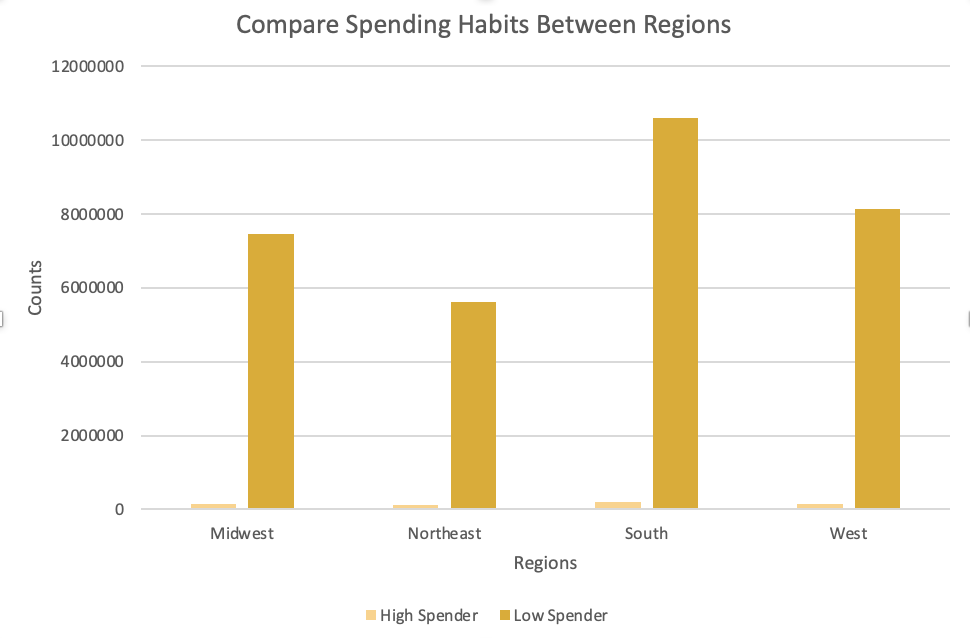

The bar grapgh represents the difference between each rehion and if they are low or high spenders. All four regions are low spenders and have a low amount of high spenders. 

## 4. Create Exclusion Falg for low-activity customers 

In [22]:
df_all.loc[df_all['max_order']>= 5, 'Exclusion flag'] = 'High Activity Customer'
df_all.loc[df_all['max_order']< 5, 'Exclusion flag'] = 'Low Activity Customer'

In [23]:
df_all[['max_order', 'Exclusion flag']].head(20)

,max_order,Exclusion flag
0,10,High Activity Customer
1,10,High Activity Customer
2,10,High Activity Customer
3,10,High Activity Customer
4,10,High Activity Customer
5,10,High Activity Customer
6,10,High Activity Customer
7,10,High Activity Customer
8,10,High Activity Customer
9,10,High Activity Customer


In [24]:
df_all[['max_order', 'Exclusion flag']].tail(20)

,max_order,Exclusion flag
32434192,26,High Activity Customer
32434193,26,High Activity Customer
32434194,26,High Activity Customer
32434195,26,High Activity Customer
32434196,26,High Activity Customer
32434197,26,High Activity Customer
32434198,26,High Activity Customer
32434199,26,High Activity Customer
32434200,26,High Activity Customer
32434201,26,High Activity Customer


In [25]:
# Check for counts
df_all['Exclusion flag'].value_counts(dropna= False)

Exclusion flag
High Activity Customer    30992664
Low Activity Customer      1441548
Name: count, dtype: int64

In [26]:
# Check total counts 
30992664 + 1441548

32434212

In [27]:
df_all.shape

(32434212, 35)

In [28]:
# Create dataframe with high activity customer
df_all_high = df_all[df_all['Exclusion flag'] == 'High Activity Customer']

In [29]:
#check dataframe
df_all_high.shape


(30992664, 35)

In [30]:
# Export the subset df for records as pickle file to Prepared Data folder

df_all_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_exclusions_high.pkl'))

New notebook created Part 1.2